## 1. input 데이터 생성
- random paramter에 대한 regression생성
- 그에 대해 난수값의 point찍는다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
# random regression, theta0= 3, theta1= 6
theta_0 = 3
theta_1 = 6

y = [] # 3+ 6*x => 회귀식에 해당하는 y값을 저장할 리스트
x = [ i for i in range(0,10)] #x값의 범위 지정 

for i in range(len(x)):
  y_arg = 3+ 6*x[i] #지정한 x에 대한 y의 범위 설정 
  y.append(y_arg)

Text(0.5, 1.0, 'random regression')

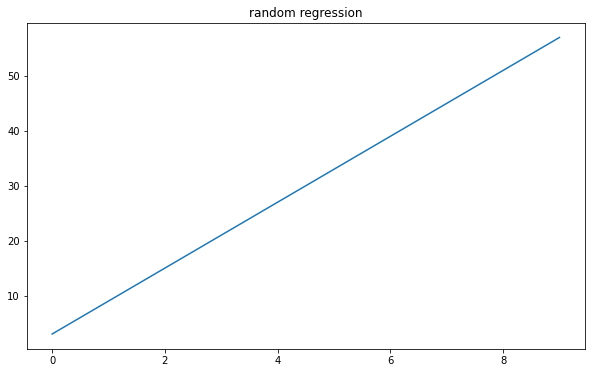

In [330]:
# 정한 회귀 직선 plotting
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title("random regression")

In [0]:
# 정한 회귀 직선을 바탕으로 데이터 생성하기 (오차  가우시안 오차)
mu = 0 # 정규분포에 대한 오차 파라미터값
sigma = 2


x_data = [] #오차를 생성하여 구한 x값
y_data = [] #오차를 생성하여 구한 y값

for i in range(10):
  error = np.random.normal(mu,sigma)
  x_data_arg = x[i]+error
  x_data.append(x_data_arg)
  y_data_arg = y[i]+error
  y_data.append(y_data_arg)

In [336]:
print(len(y_data), len(x_data)) #리스트 갯수 확인

10 10


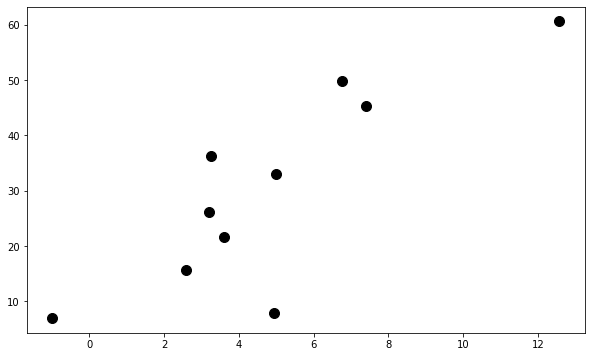

In [337]:
# plotting the data that we randomly make.
plt.figure(figsize=(10,6))
plt.plot(x_data,y_data,'ko', markersize=10)

## 2. cost function & Gradient descent
- cost에 대한 iteration을 convergence할 때까지 돌린다(Gradient Descent)
- 해당 cost값과 theta(parameters)값을 구한다. 

![image](https://user-images.githubusercontent.com/49298791/77844236-e614f400-71df-11ea-883b-16d5dac1a2ad.png)


- ***theta값을 하나의 벡터로 지정하려면 X, theta값을 변형한 형태의 array로 만들어 줘야 한다. (=> 이 방법 사용)***
- 혹은 theta0, theta1을 그대로 가져가면 복잡하긴 하지만 직관적으로 이해하긴 더 쉬울 것 같음. (어차피 행렬변환해줘야 하는 부분이므로 비효율적임, regression의 y를 표현하는 데 있어서 theta.T*x의 형태로 나타내므로 위의 방법을 사용하는 것으로 판단)

In [0]:
data = np.array([x_data,y_data]) #배열로 지정하여 값을 추가하기 위해 합친다

In [392]:
data.shape

(2, 10)

In [0]:
X=np.transpose(np.array(data[:-1]))
y=np.transpose(np.array(data[-1:]))
m=y.size

In [0]:
# X벡터값과 theta값을 받았을 때, 도출할 수 있는 linear model
def h(theta,X):
  return X.dot(theta)

In [0]:
# Objective function
def ObjectiveFunction(theta, X, y):
  return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [0]:
# X에는 1인 열을 추가한 배열 형성
X=np.insert(X, 0,1, axis=1)

In [0]:
# 초기 theta값은 아주 작은 값으로 설정, 여기서는 그냥 0으로 한다. 
theta = np.ones((2,1))

In [430]:
X[:10] #10개만 확인 

array([[ 1.        ,  4.93794361],
       [ 1.        , -0.99535374],
       [ 1.        ,  2.58772014],
       [ 1.        ,  3.60960964],
       [ 1.        ,  3.20182526],
       [ 1.        ,  5.0004766 ],
       [ 1.        ,  3.24526271],
       [ 1.        ,  7.38813526],
       [ 1.        ,  6.75258943],
       [ 1.        , 12.57531647]])

In [431]:
# initialized theta에 대한 ObjectiveFunction계산
print(ObjectiveFunction(theta,X,y))

403.25


In [0]:
# Gradient descent using Objective function
iteration = 1500 #임의로 정한 하이퍼파라미터값(GradientDescent계산시 사용할 값 미리 지정)
alpha = 0.01

def GradientDescent(X, theta):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = [] 

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        J_history.append(ObjectiveFunction(theta,X,y))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp #(theta0, theta1)하나의 벡터로 저장한다. 
    return theta, theta_history, J_history

In [0]:
# Gradient descent계산
theta, theta_history, J_history = GradientDescent(X,theta)

## 3. plotting cost function & fitting regression

In [434]:
theta #확인

array([[10.04920675],
       [ 4.19449761]])

In [435]:
J_history[:10] #cost값 10개만 확인 

[403.25,
 201.32292565118416,
 116.85673163209968,
 81.48751877552117,
 66.64423830119826,
 60.38491071999876,
 57.71718931121319,
 56.55344270612107,
 56.02031991630321,
 55.75221753696863]

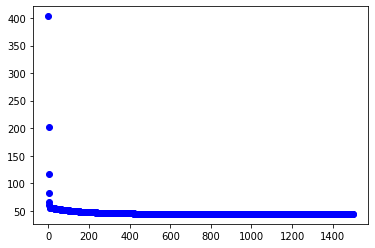

In [436]:
# cost값 plotting
plt.plot(range(len(J_history)),J_history,'bo')

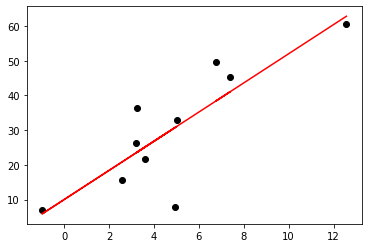

In [437]:
# fit되는 데이터 확인 
def final(x):
  return theta[0]+theta[1]*x

plt.plot(x_data, y_data, 'ko')
plt.plot(X[:,1], final(X[:,1]),'r')

## 4. plotting parameters
- 앞에서 저장한 theta(theta0, theta1)값을 시각화 하는 부분
- converge하는 부분을 확인하면 된다(=energe값 즉 cost값도 flatten되는 값이 결국 iteration이 끝나는 최적화된 값이다 

In [438]:
print(theta_history[:10],theta) #iteration돌면서 찍은 theta0, theta1값 10개만 확인 

[[1.0, 1.0], [1.245, 2.5408011185343202], [1.4131238740566403, 3.535420620714377], [1.5315228810000976, 4.176991582566118], [1.617747758631619, 4.59035563175695], [1.683143446643221, 4.856210654597638], [1.7350434429300192, 5.026719926599842], [1.7781882403053024, 5.135601888567131], [1.8156422070929066, 5.204652199901592], [1.8493862607462035, 5.247959608108756]] [[10.04920675]
 [ 4.19449761]]


In [0]:
theta0_history = [] 
theta1_history = []

for i in range(len(theta_history)):
  theta0_history.append(theta_history[i][1])
  theta1_history.append(theta_history[i][0])

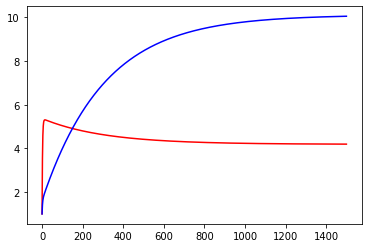

In [440]:
# plotting each parameter(theta0, theta1)
# 주의할 점은 각 theta별로 분리해서 plotting 해줘야 한다는 점. 
plt.plot(theta0_history,'r') #theta0 값
plt.plot(theta1_history,'b') #theta1 값 